<a href="https://colab.research.google.com/github/naokityokoyama/DS-exercises/blob/master/Twitter_Desaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analise de sentimento Twiiter desastre natural 

In [ ]:
from google.colab import files  
uploaded = files.upload()

Saving train.csv to train (1).csv


## Importando Bibliotecas necessarias inicial

In [ ]:
import pandas as pd
import string
import nltk
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go

In [ ]:
nltk.download('all')

In [ ]:
train = pd.read_csv('train.csv')
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train.shape[0]

7613

In [ ]:
train.target.sum()
train.shape[0]
train.shape[0] - train.target.sum()


4342

In [ ]:
trace1 = go.Bar(x = ['desaster', 'não desaster'],
                y = [train[train['target']==1].shape[0], train[train['target']==0].shape[0]],
                name='Unitario')

trace2 = go.Bar(x = ['desaster', 'não desaster'],
                y = [train.shape[0], train.shape[0]],
                name='Total')
data = [trace1, trace2]
py.iplot(data)

In [ ]:
trace = go.Bar(x = ['Desastre', 'não desastre'],
                   y = [train[train['target']==1].shape[0], train[train['target']==0].shape[0]])
                 
data = [trace]
py.iplot(data)

In [ ]:
trace1 = go.Bar(x = ['desaster', 'não desaster'],
                y = [train[train['target']==1].shape[0], train[train['target']==0].shape[0]],
                name='Unitario',
                marker = {'color': '#feca57'})
trace2 = go.Bar(x = ['desaster', 'não desaster'],
                y = [train.shape[0], train.shape[0]],
                name='Total',
                marker = {'color': '#ff9f43'})
data = [trace1, trace2]
layout = go.Layout(title = 'Desastre?',
                   xaxis = {'title': 'Desastre sim ou não'},
                   yaxis = {'title': 'Quantidade'},
                   barmode = 'stack')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

TypeError: ignored

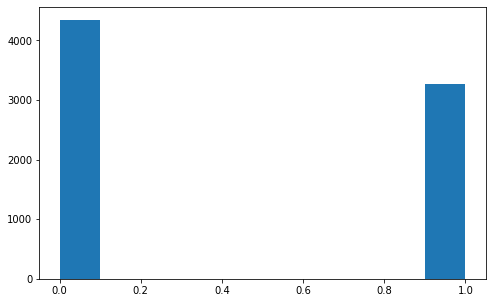

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(train.target)
plt.(train.shape[0])
plt.title('Total de twitter')
plt.ylabel('numero de targets')
plt.xlabel('desaster: 1 sim, 0 não');

## Lower

In [ ]:
#lower
frases = train.text.str.lower()
train.text = frases

In [ ]:
train.text[340]

'lee does comedy: \x89ûï@leejasper: working class tories prepare for your armageddon. #interestraterise\x89û\x9d'

In [ ]:
#função remover emoji (solução do kaggle)
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
remove_emoji("Omg another Earthquake 😔😔")

'Omg another Earthquake '

In [ ]:
train['emoji']=train['text'].apply(lambda x: remove_emoji(x))

In [ ]:
train.iloc[199:200]

,id,keyword,location,text,target,http,arroba,semarroba,prelimpa,prelimpa2,emoji
199,280,ambulance,Canada,ûï@leoblakecarter: this dog thinks he's an am...,0,http://t.co/mg1lpgr0rm,@leoblakecarter,ûï: this dog thinks he's an ambulance ?????? ...,ûï: this dog thinks he's an ambulance ?????? û,ûï: this dog thinks he's an ambulance ?????? û,ûï@leoblakecarter: this dog thinks he's an am...


## Elaborando Regex

In [ ]:
#retirando @
frase1= train.text[7578]
frase1


'@jt_ruff23 @cameronhacker and i wrecked you both'

In [ ]:
re.findall(r'@[a-z_0-9]+', frase1)

['@jt_ruff23', '@cameronhacker']

In [ ]:
#retirando [ ] e http(s)
frase2 = train.text[7610]
frase2

'm1.94 [01:04 utc]?5km s of volcano hawaii. http://t.co/zdtoyd8ebj'

In [ ]:
#tudo entre [ ]
re.findall(r'\[.+]', frase2)

['[01:04 utc]']

In [ ]:
#retirando http
re.findall(r'htt[sp]+:\/\/[a-z0-9./]+', frase2)

['http://t.co/zdtoyd8ebj']

In [ ]:
frase3 = train.text[48]
frase3
re.findall(r'htt[sp]+:\/\/[a-z0-9./]+', frase3)


['http://t.co/roi2nsmejj',
 'http://t.co/3tj8zjin21',
 'http://t.co/yduixefipe',
 'http://t.co/lxtjc87kls']

In [ ]:
train.text[7610]

'm1.94 [01:04 utc]?5km s of volcano hawaii. http://t.co/zdtoyd8ebj'

In [ ]:
#Retirando numeros e [] 
train.text[7610]
re.sub(r'[0-9\[\]:$]+', '', train.text[7610])

'm.  utc?km s of volcano hawaii. http//t.co/zdtoydebj'

In [ ]:
for i in (train.text):
  train['http'] = train['text'].str.extract('(htt[ps]+:\/\/[a-z0-9./]+)')

train.head()

KeyboardInterrupt: ignored

## Describe()

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,7613.0,5441.934848,3137.11609,1.0,2734.0,5408.0,8146.0,10873.0
target,7613.0,0.429660,0.49506,0.0,0.0,0.0,1.0,1.0


In [ ]:
htp = train[train['http'].notnull()]

In [ ]:
for i in htp.http.index:
  print (i)

In [ ]:
#Outro metodo de retir o regex diretamente (vamos passar direto o regex mas esse foi só para mostrar outro jeito)
lista = []
for i in htp.http.index:
  var = [x for x in train.text[i].split() if htp.http[i]not in x]
  lista.append(var)


In [ ]:
lista[1]

['we', 'always', 'try', 'to', 'bring', 'the', 'heavy.', '#metal', '#rt']

In [ ]:
for i in (train.text):
  train['arroba'] = train['text'].str.extract('(@[a-z_0-9]+)')

train

KeyboardInterrupt: ignored

In [ ]:
arroba = train['arroba'].loc[train.arroba.notnull()].values
arroba

array(['@bbcmtd', '@phdsquares', '@southridgelife', ..., '@engineshed',
       '@livingsafely', '@aria_ahrary'], dtype=object)

## Aplicando Regex

In [ ]:
#sem @
listafazia = []
for i in range(len(train.text)):
  listafazia.append(re.sub(r'@[a-z_0-9]+','', train.text[i]))


In [ ]:
train['semarroba'] = listafazia

In [ ]:
#http
semhttp = []
for i in range(len(train.semarroba)):
  semhttp.append(re.sub(r'htt[ps]+:\/\/[a-z0-9./]+','', train.semarroba[i]))

In [ ]:
train['prelimpa'] = semhttp

In [ ]:
# sem #
prelimpa2 = []
for i in range(len(train.prelimpa)):
  prelimpa2.append(train.prelimpa[i].replace('#', ''))

In [ ]:
#train.prelimpa.apply(lambda x: x.replace('#', ''))
#train.prelimpa.str.replace('#', '')

In [ ]:
train['prelimpa2'] = prelimpa2

In [ ]:
# sem numero
prelimpa3 = []
for i in range(len(train.prelimpa2)):
  prelimpa3.append(re.sub(r'[0-9\[\]:$]+','', train.prelimpa2[i]))


In [ ]:
train['prelimpa3'] = prelimpa3

In [ ]:
train.prelimpa3[7610]

'm.  utc?km s of volcano hawaii. '

## Retirando Pontuação

In [ ]:
#Retirando Pontuação
lista =[]
for i in range(len(train.prelimpa3)):
  sem_pontos = [ponto for ponto in train.prelimpa3[i] if ponto not in string.punctuation]
  lista.append(''.join(sem_pontos))
  #print (sem_pontos) letra por letra  

In [ ]:
train['prelimpa4'] = lista


## Word Cloud

In [ ]:
#juntando todas o dataset em uma unica lista
todas_palavras = ' '.join([texto for texto in train.prelimpa4])
todas_palavras

'our deeds are the reason of this earthquake may allah forgive us all forest fire near la ronge sask canada all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected  people receive wildfires evacuation orders in california  just got sent this photo from ruby alaska as smoke from wildfires pours into a school  rockyfire update  california hwy  closed in both directions due to lake county fire  cafire wildfires flood disaster heavy rain causes flash flooding of streets in manitou colorado springs areas im on top of the hill and i can see a fire in the woods theres an emergency evacuation happening now in the building across the street im afraid that the tornado is coming to our area three people died from the heat wave so far haha south tampa is getting flooded hah wait a second i live in south tampa what am i gonna do what am i gonna do fvck flooding raining flooding florida tampabay tampa  or  days ive lost count

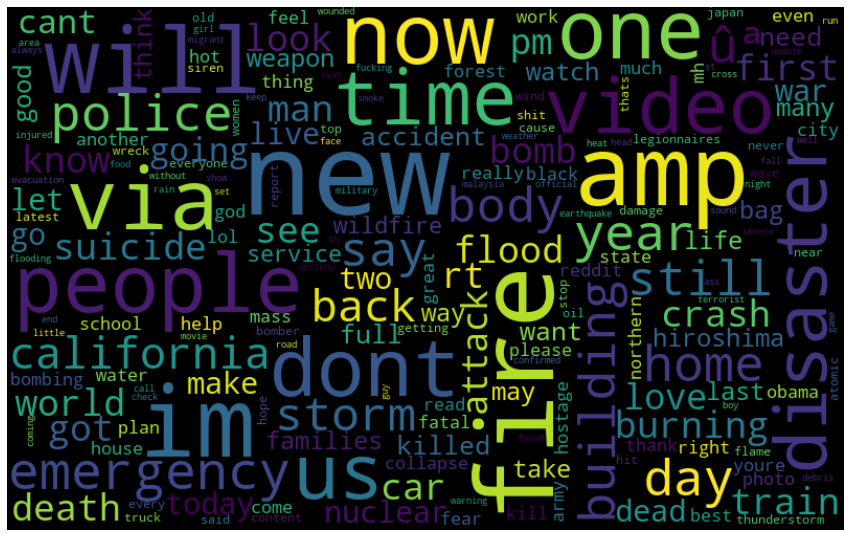

In [ ]:
#wordcloud
wordcloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False)
nuvem_palavras = wordcloud.generate(todas_palavras)

plt.figure(figsize=(15,15))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off');

## Tokenize

In [ ]:
token = nltk.tokenize.WhitespaceTokenizer()
token_frase = token.tokenize(todas_palavras)

#token_frase  #pega todas as palavras e coloca cada uma em uma lista

## Frequencia 

In [ ]:
frequencia = nltk.FreqDist
frequencia = nltk.FreqDist(token_frase)
df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()), 'Frequencia': list(frequencia.values())}) 

In [ ]:
#as 10 mais
df_frequencia.nlargest(columns='Frequencia', n=10)

,Palavra,Frequencia
3,the,3261
51,a,2188
24,in,1977
22,to,1945
5,of,1823
79,and,1418
80,i,1398
95,is,944
181,for,890
76,on,853


In [ ]:
dffreq1 = df_frequencia.nlargest(columns='Frequencia', n=10)
dffreq1['Frequencia'].values

array([3261, 2188, 1977, 1945, 1823, 1418, 1398,  944,  890,  853])

In [ ]:
trace = go.Bar(x = dffreq1['Palavra'],
                   y = dffreq1['Frequencia'])
                 
data = [trace]
py.iplot(data)

In [ ]:
#as 10 menos
df_frequencia.nsmallest(columns='Frequencia', n=10)

,Palavra,Frequencia
17,ronge,1
18,sask,1
27,notified,1
45,ruby,1
49,pours,1
58,directions,1
71,manitou,1
117,fvck,1
120,tampabay,1
144,goooooooaaaaaal,1


## Stop Word

In [ ]:
stopword = nltk.corpus.stopwords.words('english')
token.tokenize('A casa da mae')

['A', 'casa', 'da', 'mae']

In [ ]:
#for encadeado o primeiro separa o dataset em palavras como o split o segundo corre cada palavra para saber se alguma é um stop word e depois join

frase_processada = []
for i in train.prelimpa4:
  nova_frase = []
  palavras_texto = token.tokenize(i)
  for j in palavras_texto:
    if j not in stopword:
      nova_frase.append(j)
  frase_processada.append(' '.join(nova_frase))  

In [ ]:
train['processada'] = frase_processada

In [ ]:
train.processada

0            deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified officer...
3       people receive wildfires evacuation orders cal...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    control wild fires california even northern pa...
7610                                 utckm volcano hawaii
7611    police investigating ebike collided car little...
7612    latest homes razed northern california wildfir...
Name: processada, Length: 7613, dtype: object

## Frequencia 2

In [ ]:
todas_palavras2 = ' '.join([texto for texto in train.processada])
todas_palavras2

'deeds reason eahquake may allah forgive us forest fire near la ronge sask canada residents asked shelter place notified officers evacuation shelter place orders expected people receive wildfires evacuation orders california got sent photo ruby alaska smoke wildfires pours school rockyfire update california hwy closed directions due lake county fire cafire wildfires flood disaster heavy rain causes flash flooding streets manitou colorado springs areas  top hill see fire woods theres emergency evacuation happening building across street  afraid tornado coming area three people died heat wave far haha south ta getting flooded hah wait second live south ta gonna gonna fvck flooding raining flooding florida tabay ta days ive lost count flood bago myanmar arrived bago damage school bus multi car crash breaking whats man love fruits summer lovely car fast goooooooaaaaaal ridiculous london cool love skiing wonderful day looooool wayi cant eat shit nyc last week love girlfriend cooool like pas

In [ ]:
token_frase2 = token.tokenize(todas_palavras2)

In [ ]:
frequencia = nltk.FreqDist(token_frase2)
df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()), 'Frequencia': list(frequencia.values())}) 

In [ ]:
#as 10 mais
dffreq2 = df_frequencia.nlargest(columns='Frequencia', n=10)
dffreq2 

,Palavra,Frequencia
126,like,345
8,fire,250
218,get,229
153,new,224
708,via,220
23,people,195
678,news,195
572,one,193
331,dont,191
6,us,170


In [ ]:
trace = go.Bar(x = dffreq2['Palavra'],
                   y = dffreq2['Frequencia'])
                 
data = [trace]
py.iplot(data)

In [ ]:
#as 10 menos
df_frequencia.nsmallest(columns='Frequencia', n=10)

,Palavra,Frequencia
11,ronge,1
12,sask,1
18,notified,1
30,ruby,1
33,pours,1
39,directions,1
52,manitou,1
85,fvck,1
88,tabay,1
109,goooooooaaaaaal,1


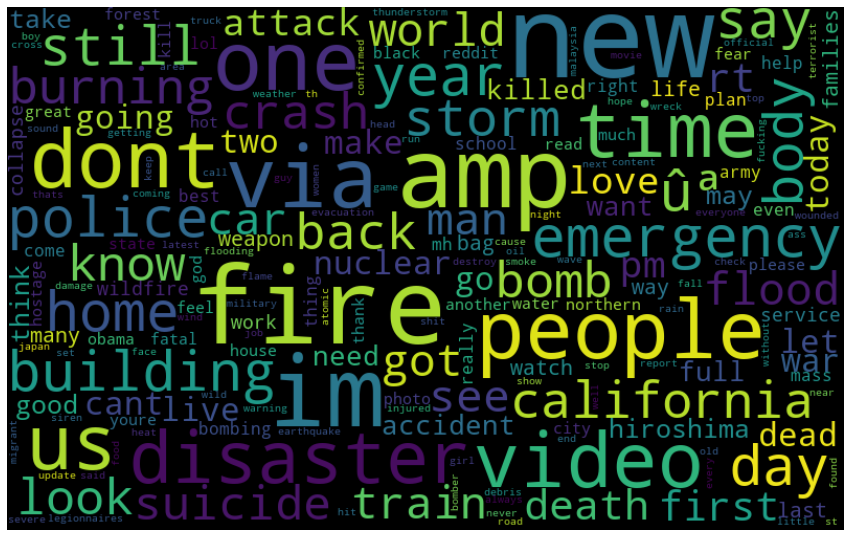

In [ ]:
#wordcloud
wordcloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False)
nuvem_palavras = wordcloud.generate(todas_palavras2)

plt.figure(figsize=(15,15))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off');

In [ ]:
train['processada'] = train.processada.apply(lambda x: x.replace('amp',''))
train['processada'] = train.processada.apply(lambda x: x.replace('im',''))
train['processada'] = train.processada.apply(lambda x: x.replace('rt',''))
train['processada'] = train.processada.apply(lambda x: x.replace('û',''))

## Stem

In [ ]:
stemmer = nltk.RSLPStemmer()

In [ ]:
frase_processada1 = []
for i in train.processada:
  nova_frase = []
  palavras_texto = token.tokenize(i)
  for j in palavras_texto:
    nova_frase.append(stemmer.stem(j)) #aplicado o stem em cada palavra
  frase_processada1.append(' '.join(nova_frase))

train['processada1'] = frase_processada1

In [ ]:
train['processada']

0              deeds reason eahquake may allah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified officer...
3       people receive wildfires evacuation orders cal...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    control wild fires california even nohern pa s...
7610                                 utckm volcano hawaii
7611    police investigating ebike collided car little...
7612    latest homes razed nohern california wildfire ...
Name: processada, Length: 7613, dtype: object

In [ ]:
train['processada1']

0                 deed reason eahquak may allah forgiv us
1                          forest fir ne la rong sask can
2       resident asked shelt plac notified offic evacu...
3              peopl receiv wildf evacuation ord californ
4         got sent phot ruby alask smok wildf pour school
                              ...                        
7608      two giant cran holding bridg collaps nearby hom
7609    control wild fir californ even nohern pa stat ...
7610                                     utckm volc hawai
7611    polic investigating ebik collided car littl po...
7612       latest hom razed nohern californ wildf abc new
Name: processada1, Length: 7613, dtype: object

## Bag Of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bag = CountVectorizer()
bagofword = bag.fit_transform(train.processada1)

X1 = bagofword.todense()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label = LabelEncoder()
pd.DataFrame(caracteristicas.todense())

## TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(lowercase=False)
caracteristicas = tfidf.fit_transform(train.processada1)

In [ ]:
#df = pd.DataFrame(caracteristicas.todense(), columns=tfidf.get_feature_names() )
#df

In [ ]:
# caracteristicas e target 
X = caracteristicas.todense()
y = train.target

In [ ]:
#separando em treino e teste e aplicando 1 primeiro modelo de ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)   #test-> valid

In [ ]:
naive = MultinomialNB()
naive.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#previsao 
y_pred_test = naive.predict(X_test)
y_pred_train = naive.predict(X_train)

In [ ]:
#f1 de teste
f1_test = f1_score(y_test, y_pred_test)
f1_train = f1_score(y_train, y_pred_train)

print (f'F1_test {f1_test:.2f} F1_train {f1_train:.2f} ')

F1_test 0.76 F1_train 0.86 


In [ ]:
#acuracia de teino
model.score(X_train, y_train)

0.8931034482758621

In [ ]:
#y_pred teste
y_pred = model.predict(X_valid)
f1_score(y_valid, y_pred)

NameError: ignored

In [ ]:
#y_pred treino
y_predtreino = model.predict(X_train)
f1_score(y_train, y_predtreino)

0.8552188552188551

In [ ]:
import numpy as np
f1_score(y_valid, np.ones(len(y_valid)))

NameError: ignored

In [ ]:
f1_score(y_valid, y_pred)

NameError: ignored

Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

from sklearn.model_selection import cross_val_predict

In [ ]:
log = LogisticRegression()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
svm = SVC()
neural = MLPClassifier()

In [ ]:
scoring = 'f1'
kfold = KFold(n_splits=5, shuffle=True) 

In [ ]:
#Aplicando Cross Validation nos 5 modelos 
cross_log = cross_validate(log, X_train,y_train, cv=kfold  ,scoring=scoring, return_estimator=True)
'''cross_rf = cross_validate(rf, X_train,y_train, cv=kfold ,scoring=scoring)#, return_estimator=True)
cross_gb = cross_validate(gb, X_train,y_train, cv=kfold,scoring=scoring) #, return_estimator=True)
cross_svm = cross_validate(svm, X_train,y_train, cv=kfold, scoring=scoring) #, return_estimator=True)
cross_neural = cross_validate(neural, X_train,y_train, cv=kfold, scoring=scoring) #, return_estimator=True)'''

logcv = cross_log['test_score'].mean()
'''gbcv = cross_gb['test_score'].mean()
rfcv = cross_rf['test_score'].mean()
svmcv = cross_svm['test_score'].mean()
neuralcv = cross_neural['test_score'].mean()'''

print (f'O F1 da Logistic Regression foi de {logcv:.2f}')
'''print (f'O F1 da Gradient Booster foi de {gbcv:.2f}')
print (f'O F1 da Random Forest foi de {rfcv:.2f}')
print (f'O F1 da SVM foi de {svmcv:.2f}')
print (f'O F1 da MLP Classifier  foi de {neuralcv:.2f}')'''

O F1 da Logistic Regression foi de 0.72


"print (f'O F1 da Gradient Booster foi de {gbcv:.2f}')\nprint (f'O F1 da Random Forest foi de {rfcv:.2f}')\nprint (f'O F1 da SVM foi de {svmcv:.2f}')\nprint (f'O F1 da MLP Classifier  foi de {neuralcv:.2f}')"

In [ ]:
all_predictions = []
for estimador in cross_log['estimator']:
  y_pred = estimador.predict(X_test)
  all_predictions.append(y_pred)

In [ ]:
y_pred_test_cross = np.median(all_predictions, axis=0)
f1_cross = f1_score(y_test, y_pred_test_cross)
print (f'Cross Validation resultado foi de {f1_cross:.2f}')

Cross Validation resultado foi de 0.74


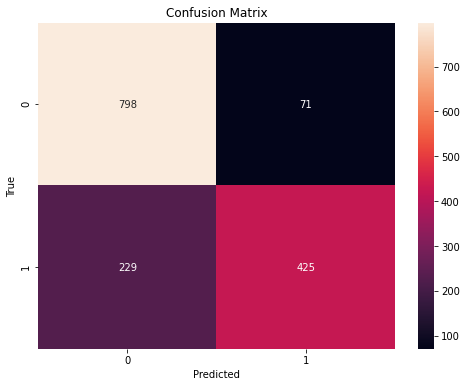

In [ ]:
plt.figure(figsize=(8,6),facecolor=(1, 1, 1))
cm = confusion_matrix(y_test, y_pred_test_cross)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix');

In [ ]:
#matrix de confusão e como fazer para CV
from yellowbrick.classifier import ConfusionMatrix

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



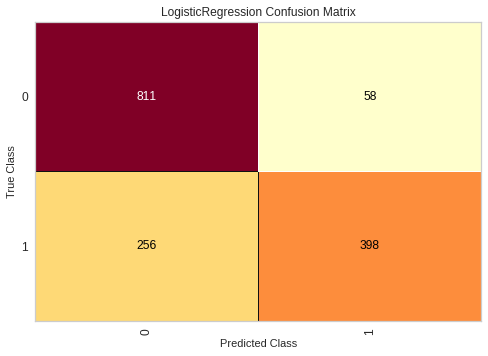

In [ ]:
visualizador = ConfusionMatrix(LogisticRegression()) 
visualizador.fit(X_train, y_train) 
visualizador.score(X_test, y_test) 
visualizador.poof()

In [ ]:
X_train.shape

(6090, 14662)